In [25]:
from pandas import read_csv
from seaborn import violinplot

key = ["0.2"]*150 + ["0.5"]*150 + ["0.8"]*150
p = []
for r2 in ["0.2", "0.5", "0.8"]:
    pruned = list(read_csv(f"no_pruned_{r2}.txt", sep=" ", names=["pruned", "file"])["pruned"].values)
    p += pruned

In [48]:
from seaborn import boxplot

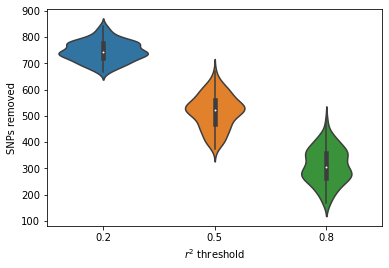

In [30]:
violinplot(x=key, y=p)
import matplotlib.pyplot as plt
plt.ylabel("SNPs removed")
plt.xlabel("$r^2$ threshold")
plt.savefig("prun.jpeg")

In [44]:
def get_causals(h2s, i):
    p = f"/home/shussain/Simulated_data/01072021/{h2s}/simulation_output{i}/PS/output/ct.csv"
    causals = read_csv(p).query("causal == 1")["SNP"].values
    return causals

def get_left(h2s, i, r2):
    p = f"/home/shussain/Simulated_data/01072021/{h2s}/simulation_output{i}/prelim/pruned/r2_{r2}.prune.in"
    left = read_csv(p, sep=" ", names=["SNP"])["SNP"].values
    return left

import numpy as np
from itertools import product

captured = []

for h2s, i in product(["0.05", "0.5", "1"], list(range(1, 51))):
    for r2 in [0.2, 0.5, 0.8]:
        common = np.intersect1d(get_left(h2s, i, r2), get_causals(h2s, i))
        captured.append(10*len(common))

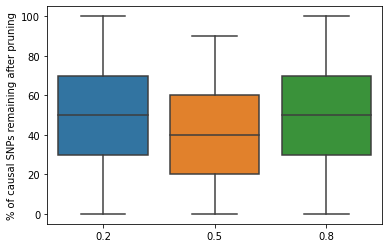

In [49]:
boxplot(x=key, y=captured)
plt.ylabel("% of causal SNPs remaining after pruning")
plt.savefig("left_box.jpeg")

In [13]:
read_csv("no_pruned_0.2.txt", sep=" ", names=["pruned", "file"])

,pruned,file
0,680,/home/shussain/Simulated_data/01072021/0.05/si...
1,692,/home/shussain/Simulated_data/01072021/0.05/si...
2,705,/home/shussain/Simulated_data/01072021/0.05/si...
3,756,/home/shussain/Simulated_data/01072021/0.05/si...
4,769,/home/shussain/Simulated_data/01072021/0.05/si...
...,...,...
145,746,/home/shussain/Simulated_data/01072021/1/simul...
146,742,/home/shussain/Simulated_data/01072021/1/simul...
147,714,/home/shussain/Simulated_data/01072021/1/simul...
148,779,/home/shussain/Simulated_data/01072021/1/simul...
